#### import libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import resample
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix

#### import Dataset

In [60]:
train_da=pd.read_csv("mitbih_train.csv",header=None)
test_da=pd.read_csv("mitbih_test.csv",header=None)
train_da

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


####  visuaize date

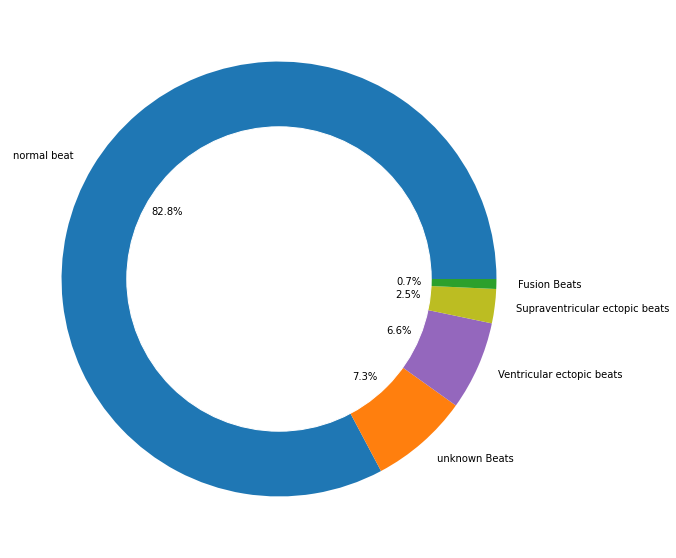

In [61]:
classes=train_da[187].value_counts()
plt.figure(figsize=(20,10))
circle=plt.Circle((0,0),0.7,color="white")
plt.pie(classes,labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(circle)

#### Resample

In [62]:
# as we see from the previous charts there are a huge difference betwen the value of each categories
df1=train_da[train_da[187]==1]
df2=train_da[train_da[187]==2]
df3=train_da[train_da[187]==3]
df4=train_da[train_da[187]==4]
df0=(train_da[train_da[187]==0]).sample(n=20000,random_state=42,replace=True)

In [63]:
df_1_upsample=resample(df1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df4,replace=True,n_samples=20000,random_state=126)

train_da=pd.concat([df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df0])

#### visualize data after sampling

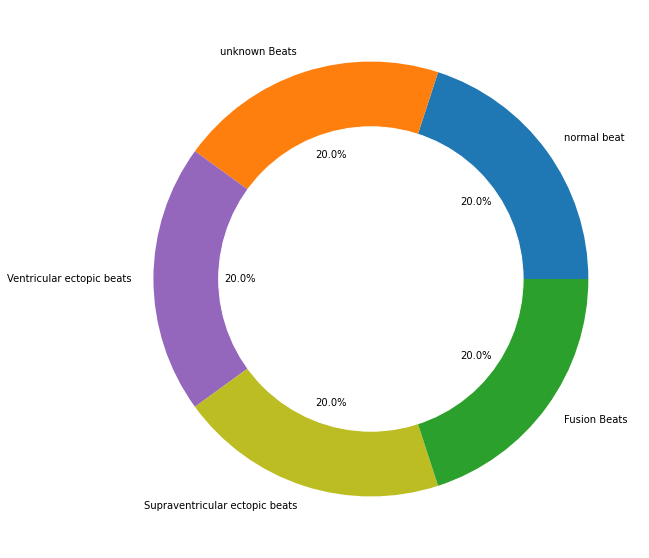

In [64]:
classes=train_da[187].value_counts()
plt.figure(figsize=(20,10))
circle=plt.Circle((0,0),0.7,color="white")
plt.pie(classes,labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(circle)

#### visualize Each Class

In [65]:
newclassess=train_da.groupby(187,group_keys=False).apply(lambda train_da:train_da.sample(1))

In [66]:
plt.figure(figsize=(14,8))



<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

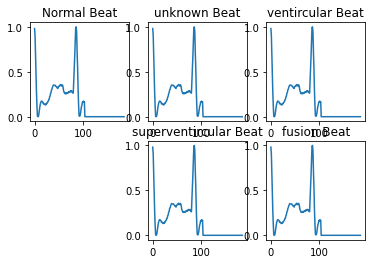

In [67]:
plt.subplot(2,3,1)
plt.plot(newclassess.iloc[0,:186])
plt.title("Normal Beat")
plt.subplot(2,3,2)
plt.plot(newclassess.iloc[0,:186])
plt.title("unknown Beat")
plt.subplot(2,3,3)
plt.plot(newclassess.iloc[0,:186])
plt.title("ventircular Beat")
plt.subplot(2,3,5)
plt.plot(newclassess.iloc[0,:186])
plt.title("superventircular Beat")
plt.subplot(2,3,6)
plt.plot(newclassess.iloc[0,:186])
plt.title("fusion Beat")
plt.show()

###### Normal beat

In [68]:
def plot_hist(class_number,size,min_):
    # get the class data
    img=train_da.loc[train_da[187]==class_number].values
    # crop it
    img=img[:,min_:size]
    # creates a continous steam of data
    img_flatten=img.flatten()
    
    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


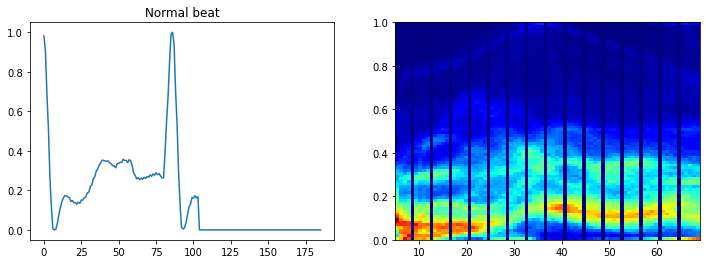

In [69]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)  
plt.plot(newclassess.iloc[0,:186])
plt.title('Normal beat')
plt.subplot(1, 2, 2)  
plot_hist(0,70,5)

###### unknown

900000
900000


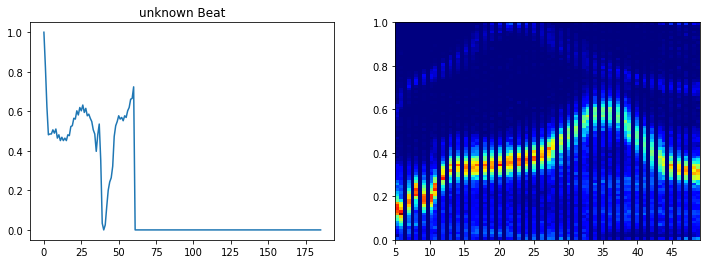

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(newclassess.iloc[1,:186])
plt.title('unknown Beat')
plt.subplot(1, 2, 2)  
plot_hist(1,50,5)

###### veb

600000
600000


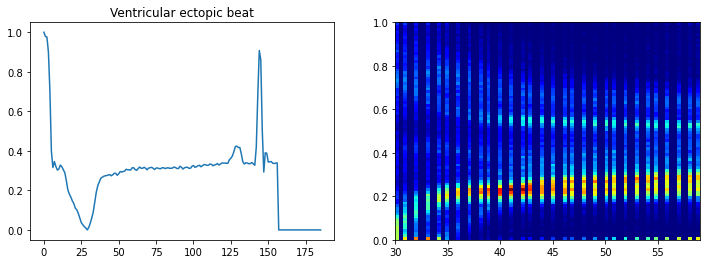

In [71]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)  
plt.plot(newclassess.iloc[2,:186])
plt.title('Ventricular ectopic beat')
plt.subplot(1, 2, 2) 
plot_hist(2,60,30)

700000
700000


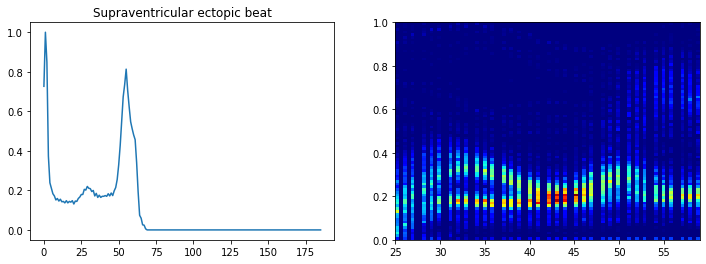

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1) 
plt.plot(newclassess.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
plt.subplot(1, 2, 2) 
plot_hist(3,60,25)

640000
640000


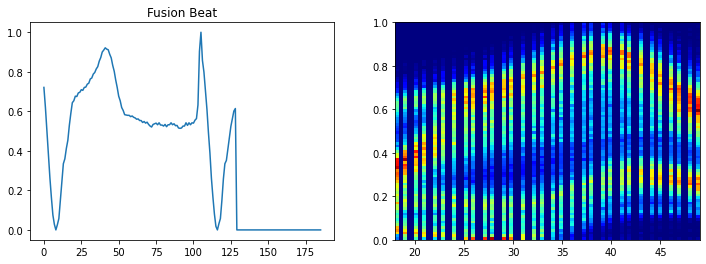

In [73]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)   
plt.plot(newclassess.iloc[4,:186])
plt.title('Fusion Beat')
plt.subplot(1, 2, 2) 
plot_hist(4,50,18)

##### Add Noise

In [74]:
def add_gaussiannoise(signal):
    noise=np.random.normal(0,0.05,186)
    return signal+noise

In [75]:
tempo=newclassess.iloc[0,:186]
bruiter=add_gaussiannoise(tempo)

##### visualize nosing data

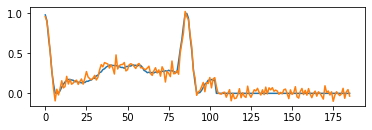

In [76]:
plt.subplot(2,1,1)
plt.plot(newclassess.iloc[0,:186])
plt.plot(bruiter)
plt.show()

#### split date

In [77]:
target_train=train_da[187]
target_test=test_da[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [78]:
X_train=train_da.iloc[:,:186].values
X_test=test_da.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussiannoise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

#### Create model

In [79]:
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=15,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [80]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/15
3125/3125 [==============================] - 65s 20ms/step - loss: 0.2532 - accuracy: 0.9082 - val_loss: 0.2096 - val_accuracy: 0.9235
Epoch 2/15
3125/3125 [==============================] - 65s 21ms/step - loss: 0.1241 - accuracy: 0.9552 - val_loss: 0.2342 - val_accuracy: 0.9234
Epoch 3/15
3125/3125 [==============================] - 63s 20ms/step - loss: 0.0907 - accuracy: 0.9678 - val_loss: 0.2031 - val_accuracy: 0.9306
Epoch 4/15
3125/3125 [==============================] - 68s 22ms/step - loss: 0.0717 - accuracy: 0.9741 - val_loss: 0.1902 - val_accuracy: 0.9426
Epoch 5/15
3125/3125 [==============================] - 71s 23ms/step - loss: 0.0613 - accuracy: 0.9782 - val_loss: 0.1879 - val_accuracy: 0.9422
Epoch 6/15
3125/3125 [==============================] - 58s 19ms/step - loss: 0.0525 - accuracy: 0.9817 - val_loss: 0.1717 - val_accuracy: 0.9565
Epoch 7/15
3125/3125 [==============================] - 56s 18ms/step - loss: 0.0467 - accuracy: 0.9836 - val_loss: 0.1879 -

#### Evaluate Data

In [86]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

Accuracy: 95.65%


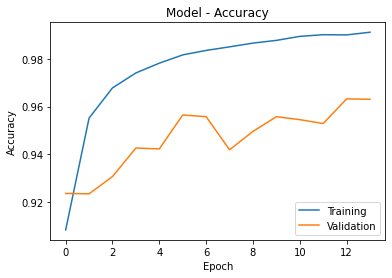

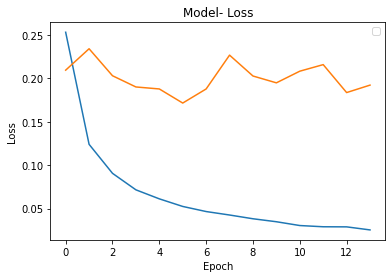

In [87]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)